<a href="https://colab.research.google.com/github/Surbhikhandelwal65/AdvancedMachineLearning/blob/main/811128357_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Machine Learning Assignment 1 - Neural Networks
### Surbhi Khandelwal 

# Classifying movie reviews: a binary classification example
In this example, we will learn to classify movie reviews into "positive" reviews and "negative" reviews, just based on the text content of the reviews.

## The IMDB dataset
We'll be working with "IMDB dataset", a set of 50,000 highly-polarized reviews from the Internet Movie Database. They are split into 25,000 reviews for training and 25,000 reviews for testing, each set consisting in 50% negative and 50% positive reviews.


In [ ]:
import keras
keras.__version__

'2.4.3'

In [ ]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

The argument num_words=10000 means that we will only keep the top 10,000 most frequently occurring words in the training data. Rare words will be discarded. This allows us to work with vector data of manageable size.

The variables train_data and test_data are lists of reviews, each review being a list of word indices (encoding a sequence of words). 

train_labels and test_labels are lists of 0s and 1s, 

where 0 stands for "negative" and 

1 stands for "positive":

In [ ]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [ ]:
train_labels

array([1, 0, 0, ..., 0, 1, 0])

The reversal of numbered review into words.

In [ ]:
# word_index is a dictionary mapping words to an integer index
word_index = imdb.get_word_index()
# We reverse it, mapping integer indices to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# We decode the review; note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
decoded_review

1646592/1641221 [==============================] - 0s 0us/step


"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

## Preparing the data
We cannot feed lists of integers into a neural network. We have to turn our lists into tensors. There are two ways we could do that:

We are going to one-hot-encode our lists to turn them into vectors of 0s and 1s. Concretely, this would mean for instance turning the sequence [3, 5] into a 10,000-dimensional vector that would be all-zeros except for indices 3 and 5, which would be ones. Then we could use as first layer in our network a Dense layer, capable of handling floating point vector data.


In [ ]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

In [ ]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

We should also vectorize our labels:



In [ ]:
# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

## Building our network
Our input data is simply vectors, and our labels are scalars (1s and 0s). A type of network that performs well on such a problem would be a simple stack of fully-connected (Dense) layers with relu activations: Dense(16, 
activation='relu')

There are two key architecture decisions to be made about such stack of dense layers:

How many layers to use.
How many "hidden units" to chose for each layer.


In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


Optimizer function

In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])


## Validating our approach
In order to monitor during training the accuracy of the model on data that it has never seen before, we will create a "validation set" by setting apart 10,000 samples from the original training data:



In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]


We will now train our model for 20 epochs (20 iterations over all samples in the x_train and y_train tensors), in mini-batches of 512 samples. At this same time we will monitor loss and accuracy on the 10,000 samples that we set apart. This is done by passing the validation data as the validation_data argument:



In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))


Epoch 1/20
30/30 [==============================] - 2s 54ms/step - loss: 0.5968 - accuracy: 0.7110 - val_loss: 0.4051 - val_accuracy: 0.8719
Epoch 2/20
30/30 [==============================] - 1s 35ms/step - loss: 0.3410 - accuracy: 0.9035 - val_loss: 0.3141 - val_accuracy: 0.8841
Epoch 3/20
30/30 [==============================] - 1s 35ms/step - loss: 0.2439 - accuracy: 0.9232 - val_loss: 0.2791 - val_accuracy: 0.8901
Epoch 4/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1776 - accuracy: 0.9460 - val_loss: 0.2745 - val_accuracy: 0.8917
Epoch 5/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1431 - accuracy: 0.9559 - val_loss: 0.2782 - val_accuracy: 0.8874
Epoch 6/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1141 - accuracy: 0.9679 - val_loss: 0.2927 - val_accuracy: 0.8870
Epoch 7/20
30/30 [==============================] - 1s 35ms/step - loss: 0.0975 - accuracy: 0.9710 - val_loss: 0.3235 - val_accuracy: 0.8784
Epoch 8/20
30

We can see here that we have the highest accuracy of 0.8980 and lowest loss of 0.2764 at epoch 3. So we will run our network for 4 epochs.

In [ ]:

history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

##Using Matlab
Using matlab to check how the accuracy and loss are affected by the no. of epochs:

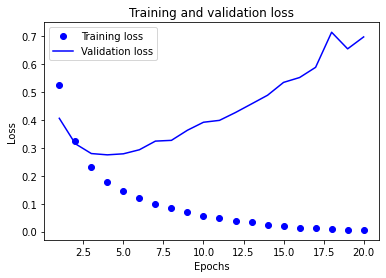

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

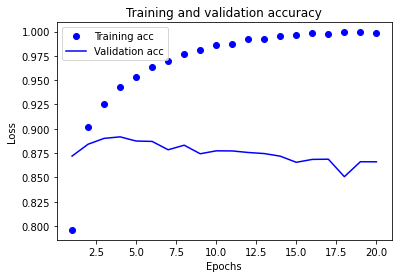

In [ ]:
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

So Let's train a new network with 4 epochs:

In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 27ms/step - loss: 0.5418 - accuracy: 0.7461
Epoch 2/4
49/49 [==============================] - 1s 30ms/step - loss: 0.2672 - accuracy: 0.9108
Epoch 3/4
49/49 [==============================] - 1s 27ms/step - loss: 0.1938 - accuracy: 0.9324
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.2992 - accuracy: 0.8820


Checking Accuracy

Using a trained network to generate predictions on new data
After having trained a network, you will want to use it in a practical setting. You can generate the likelihood of reviews being positive by using the predict method:

In [ ]:
model.predict(x_test)


array([[0.19348451],
       [0.9996717 ],
       [0.8899665 ],
       ...,
       [0.15438974],
       [0.10054728],
       [0.70193344]], dtype=float32)

##1. Using 1 or 3 hidden layers and seeing the validation and test accuracy

Epoch 1/20
49/49 [==============================] - 3s 53ms/step - loss: 0.5314 - accuracy: 0.7493 - val_loss: 0.3475 - val_accuracy: 0.8767
Epoch 2/20
49/49 [==============================] - 2s 39ms/step - loss: 0.2795 - accuracy: 0.9127 - val_loss: 0.2935 - val_accuracy: 0.8883
Epoch 3/20
49/49 [==============================] - 2s 39ms/step - loss: 0.2189 - accuracy: 0.9266 - val_loss: 0.2834 - val_accuracy: 0.8870
Epoch 4/20
49/49 [==============================] - 2s 39ms/step - loss: 0.1795 - accuracy: 0.9422 - val_loss: 0.2819 - val_accuracy: 0.8871
Epoch 5/20
49/49 [==============================] - 2s 39ms/step - loss: 0.1612 - accuracy: 0.9462 - val_loss: 0.2876 - val_accuracy: 0.8849
Epoch 6/20
49/49 [==============================] - 2s 39ms/step - loss: 0.1424 - accuracy: 0.9549 - val_loss: 0.3024 - val_accuracy: 0.8806
Epoch 7/20
49/49 [==============================] - 2s 39ms/step - loss: 0.1291 - accuracy: 0.9577 - val_loss: 0.3127 - val_accuracy: 0.8793
Epoch 8/20
49

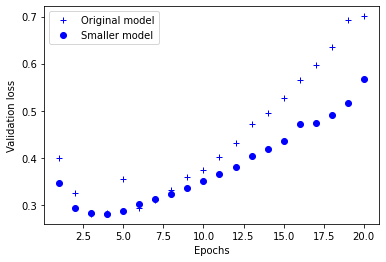

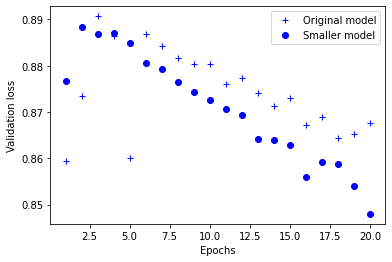

In [ ]:
#Building the model with 1 layer

from keras import models
from keras import layers

Layer1_model = models.Sequential()
Layer1_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
Layer1_model.add(layers.Dense(1, activation='sigmoid'))


Layer1_model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])


Layer1_model_hist = Layer1_model.fit(x_train, y_train,
                                       epochs=20,
                                       batch_size=512,
                                       validation_data=(x_test, y_test))



In [ ]:
epochs = range(1, 21)
Layer1_model_val_loss = Layer1_model_hist.history['val_loss']


Layer1_model_val_acc = Layer1_model_hist.history['val_accuracy']

import matplotlib.pyplot as plt

# b+ is for "blue cross"
plt.plot(epochs, val_loss, 'b+', label='Original model')
# "bo" is for "blue dot"
plt.plot(epochs, Layer1_model_val_loss, 'bo', label='Layer 1 model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()


In [ ]:
# b+ is for "blue cross"
plt.plot(epochs, val_acc, 'b+', label='Original model')
# "bo" is for "blue dot"
plt.plot(epochs, Layer1_model_val_acc, 'bo', label='Layer 1 model')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()

plt.show()


In [ ]:
We can see that at epoch 4 we have the highest accuracy.

In [ ]:
Layer1_model = models.Sequential()
Layer1_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
Layer1_model.add(layers.Dense(1, activation='sigmoid'))

Layer1_model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Layer1_model.fit(x_train, y_train, epochs=4, batch_size=512)
results = Layer1_model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 27ms/step - loss: 0.5246 - accuracy: 0.7573
Epoch 2/4
49/49 [==============================] - 1s 27ms/step - loss: 0.2718 - accuracy: 0.9109
Epoch 3/4
49/49 [==============================] - 1s 27ms/step - loss: 0.2117 - accuracy: 0.9311
Epoch 4/4
782/782 [==============================] - 1s 2ms/step - loss: 0.3042 - accuracy: 0.8756


Building Model with 3 Layers

In [ ]:
#Building the model with 3 layers

from keras import models
from keras import layers

Layer3_model = models.Sequential()
Layer3_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
Layer3_model.add(layers.Dense(16, activation='relu'))
Layer3_model.add(layers.Dense(16, activation='relu'))
Layer3_model.add(layers.Dense(1, activation='sigmoid'))


Layer3_model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])


Layer3_model_hist = Layer3_model.fit(x_train, y_train,
                                       epochs=20,
                                       batch_size=512,
                                       validation_data=(x_test, y_test))



Epoch 1/20
49/49 [==============================] - 3s 46ms/step - loss: 0.5668 - accuracy: 0.7615 - val_loss: 0.3549 - val_accuracy: 0.8745
Epoch 2/20
49/49 [==============================] - 2s 38ms/step - loss: 0.2845 - accuracy: 0.9038 - val_loss: 0.2837 - val_accuracy: 0.8902
Epoch 3/20
49/49 [==============================] - 2s 39ms/step - loss: 0.1971 - accuracy: 0.9320 - val_loss: 0.3148 - val_accuracy: 0.8756
Epoch 4/20
49/49 [==============================] - 2s 39ms/step - loss: 0.1661 - accuracy: 0.9400 - val_loss: 0.2975 - val_accuracy: 0.8845
Epoch 5/20
49/49 [==============================] - 2s 39ms/step - loss: 0.1404 - accuracy: 0.9512 - val_loss: 0.3521 - val_accuracy: 0.8680
Epoch 6/20
49/49 [==============================] - 2s 39ms/step - loss: 0.1197 - accuracy: 0.9606 - val_loss: 0.3514 - val_accuracy: 0.8742
Epoch 7/20
49/49 [==============================] - 2s 39ms/step - loss: 0.1066 - accuracy: 0.9647 - val_loss: 0.3891 - val_accuracy: 0.8709
Epoch 8/20
49

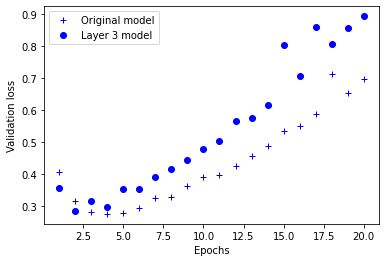

In [ ]:
epochs = range(1, 21)
Layer3_model_val_loss = Layer3_model_hist.history['val_loss']


Layer3_model_val_acc = Layer3_model_hist.history['val_accuracy']

import matplotlib.pyplot as plt

# b+ is for "blue cross"
plt.plot(epochs, val_loss, 'b+', label='Original model')
# "bo" is for "blue dot"
plt.plot(epochs, Layer3_model_val_loss, 'bo', label='Layer 3 model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()


It looks like our original model was performing better.

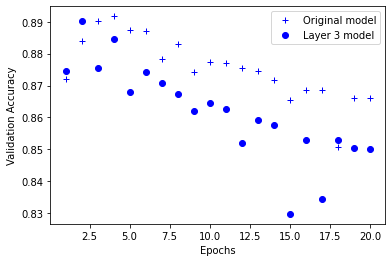

In [ ]:
# b+ is for "blue cross"
plt.plot(epochs, val_acc, 'b+', label='Original model')
# "bo" is for "blue dot"
plt.plot(epochs, Layer3_model_val_acc, 'bo', label='Layer 3 model')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()

plt.show()


In [ ]:
Here too, our model performs best at epoch=4.

In [ ]:
Layer3_model = models.Sequential()
Layer3_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
Layer3_model.add(layers.Dense(16, activation='relu'))
Layer3_model.add(layers.Dense(16, activation='relu'))
Layer3_model.add(layers.Dense(1, activation='sigmoid'))

Layer3_model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Layer3_model.fit(x_train, y_train, epochs=4, batch_size=512)
results3 = Layer3_model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 24ms/step - loss: 0.5711 - accuracy: 0.7361
Epoch 2/4
49/49 [==============================] - 1s 24ms/step - loss: 0.2691 - accuracy: 0.9124
Epoch 3/4
49/49 [==============================] - 1s 25ms/step - loss: 0.1969 - accuracy: 0.9314
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.2986 - accuracy: 0.8831


For The Test Data, Here are my Observations:

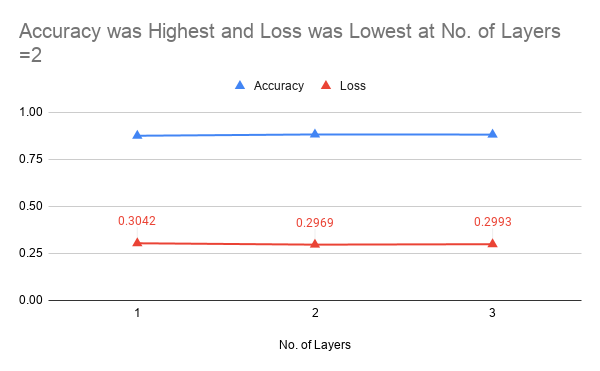

##2. Using Layers with more or less hidden units.

In [ ]:
#Building the model with 4 Hidden Units - Reducing the complexity.

from keras import models
from keras import layers

Units4_model = models.Sequential()
Units4_model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
Units4_model.add(layers.Dense(4, activation='relu'))
Units4_model.add(layers.Dense(1, activation='sigmoid'))


Units4_model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])


Units4_model_hist = Units4_model.fit(x_train, y_train,
                                       epochs=20,
                                       batch_size=512,
                                       validation_data=(x_test, y_test))



Epoch 1/20
49/49 [==============================] - 3s 43ms/step - loss: 0.6418 - accuracy: 0.5849 - val_loss: 0.5572 - val_accuracy: 0.7329
Epoch 2/20
49/49 [==============================] - 2s 34ms/step - loss: 0.5192 - accuracy: 0.8149 - val_loss: 0.5035 - val_accuracy: 0.8230
Epoch 3/20
49/49 [==============================] - 2s 35ms/step - loss: 0.4598 - accuracy: 0.8757 - val_loss: 0.4751 - val_accuracy: 0.8615
Epoch 4/20
49/49 [==============================] - 2s 34ms/step - loss: 0.4221 - accuracy: 0.9057 - val_loss: 0.4605 - val_accuracy: 0.8676
Epoch 5/20
49/49 [==============================] - 2s 34ms/step - loss: 0.3961 - accuracy: 0.9238 - val_loss: 0.4499 - val_accuracy: 0.8747
Epoch 6/20
49/49 [==============================] - 2s 34ms/step - loss: 0.3713 - accuracy: 0.9354 - val_loss: 0.4417 - val_accuracy: 0.8814
Epoch 7/20
49/49 [==============================] - 2s 34ms/step - loss: 0.3549 - accuracy: 0.9432 - val_loss: 0.4445 - val_accuracy: 0.8745
Epoch 8/20
49

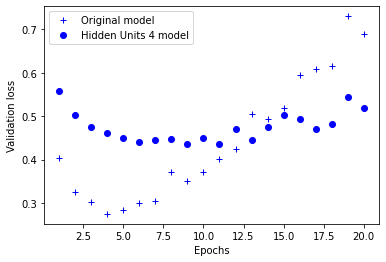

In [ ]:
epochs = range(1, 21)
Units4_model_val_loss = Units4_model_hist.history['val_loss']


Units4_model_val_acc = Units4_model_hist.history['val_accuracy']

import matplotlib.pyplot as plt

# b+ is for "blue cross"
plt.plot(epochs, val_loss, 'b+', label='Original model')
# "bo" is for "blue dot"
plt.plot(epochs, Units4_model_val_loss, 'bo', label='Hidden Units 4 model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()


As we can see from this, our original model performed much better than this model. But somewhere around epoch 4 we do see the loss at its min.

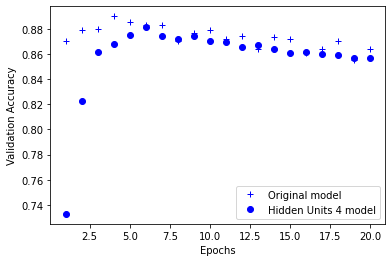

In [ ]:
# b+ is for "blue cross"
plt.plot(epochs, val_acc, 'b+', label='Original model')
# "bo" is for "blue dot"
plt.plot(epochs, Units4_model_val_acc, 'bo', label='Hidden Units 4 model')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()

plt.show()


In [ ]:
Unit4_model = models.Sequential()
Unit4_model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
Unit4_model.add(layers.Dense(4, activation='relu'))
Unit4_model.add(layers.Dense(1, activation='sigmoid'))

Unit4_model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Unit4_model.fit(x_train, y_train, epochs=4, batch_size=512)
results4 = Unit4_model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 24ms/step - loss: 0.6115 - accuracy: 0.7453
Epoch 2/4
49/49 [==============================] - 1s 23ms/step - loss: 0.4069 - accuracy: 0.8816
Epoch 3/4
49/49 [==============================] - 1s 24ms/step - loss: 0.3018 - accuracy: 0.9087
Epoch 4/4
782/782 [==============================] - 1s 2ms/step - loss: 0.2883 - accuracy: 0.8902


Building model with 34 Hidden Units

In [ ]:
#Building the model with 34 Hidden Units - Increasing the complexity.

from keras import models
from keras import layers

Units34_model = models.Sequential()
Units34_model.add(layers.Dense(34, activation='relu', input_shape=(10000,)))
Units34_model.add(layers.Dense(34, activation='relu'))
Units34_model.add(layers.Dense(1, activation='sigmoid'))


Units34_model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])


Units34_model_hist = Units34_model.fit(x_train, y_train,
                                       epochs=20,
                                       batch_size=512,
                                       validation_data=(x_test, y_test))



Epoch 1/20
49/49 [==============================] - 4s 69ms/step - loss: 0.5188 - accuracy: 0.7472 - val_loss: 0.3052 - val_accuracy: 0.8858
Epoch 2/20
49/49 [==============================] - 3s 52ms/step - loss: 0.2450 - accuracy: 0.9116 - val_loss: 0.2972 - val_accuracy: 0.8792
Epoch 3/20
49/49 [==============================] - 3s 53ms/step - loss: 0.1901 - accuracy: 0.9292 - val_loss: 0.2926 - val_accuracy: 0.8840
Epoch 4/20
49/49 [==============================] - 3s 53ms/step - loss: 0.1503 - accuracy: 0.9464 - val_loss: 0.3566 - val_accuracy: 0.8660
Epoch 5/20
49/49 [==============================] - 3s 52ms/step - loss: 0.1274 - accuracy: 0.9562 - val_loss: 0.3409 - val_accuracy: 0.8741
Epoch 6/20
49/49 [==============================] - 3s 52ms/step - loss: 0.1038 - accuracy: 0.9642 - val_loss: 0.3672 - val_accuracy: 0.8708
Epoch 7/20
49/49 [==============================] - 3s 52ms/step - loss: 0.0806 - accuracy: 0.9761 - val_loss: 0.3924 - val_accuracy: 0.8695
Epoch 8/20
49

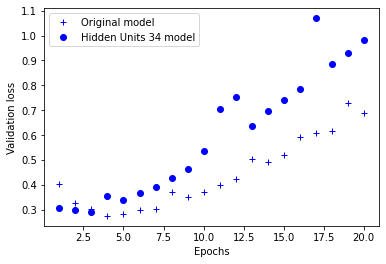

In [ ]:
epochs = range(1, 21)
Units34_model_val_loss = Units34_model_hist.history['val_loss']


Units34_model_val_acc = Units34_model_hist.history['val_accuracy']

import matplotlib.pyplot as plt

# b+ is for "blue cross"
plt.plot(epochs, val_loss, 'b+', label='Original model')
# "bo" is for "blue dot"
plt.plot(epochs, Units34_model_val_loss, 'bo', label='Hidden Units 34 model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()


Even Here we can see that our original model performed better. With 34 Hidden Units we have added a lot more complexity than needed. The lowest loss we have is it epoch=3

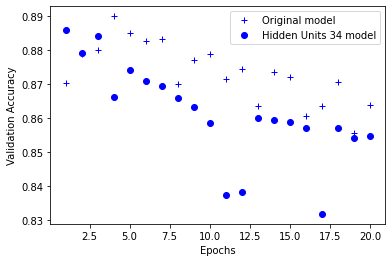

In [ ]:
# b+ is for "blue cross"
plt.plot(epochs, val_acc, 'b+', label='Original model')
# "bo" is for "blue dot"
plt.plot(epochs, Units34_model_val_acc, 'bo', label='Hidden Units 34 model')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()

plt.show()


In [ ]:
Unit34_model = models.Sequential()
Unit34_model.add(layers.Dense(34, activation='relu', input_shape=(10000,)))
Unit34_model.add(layers.Dense(34, activation='relu'))
Unit34_model.add(layers.Dense(1, activation='sigmoid'))

Unit34_model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Unit34_model.fit(x_train, y_train, epochs=3, batch_size=512)
results34 = Unit34_model.evaluate(x_test, y_test)

Epoch 1/3
49/49 [==============================] - 3s 40ms/step - loss: 0.5279 - accuracy: 0.7556
Epoch 2/3
49/49 [==============================] - 2s 39ms/step - loss: 0.2510 - accuracy: 0.9071
Epoch 3/3
782/782 [==============================] - 2s 2ms/step - loss: 0.2898 - accuracy: 0.8850


Results for the Test Set:

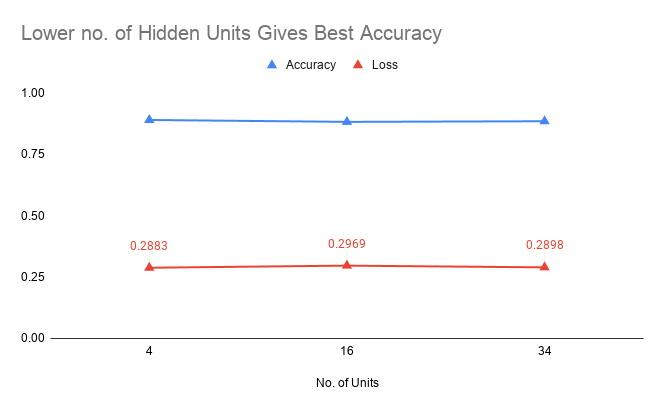

##3. Using The mse loss function.

In [ ]:
#Building the model with Loss Function = MSE

from keras import models
from keras import layers

mse_model = models.Sequential()
mse_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
mse_model.add(layers.Dense(16, activation='relu'))
mse_model.add(layers.Dense(1, activation='sigmoid'))


mse_model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['accuracy'])


mse_model_hist = mse_model.fit(x_train, y_train,
                                       epochs=20,
                                       batch_size=512,
                                       validation_data=(x_test, y_test))



Epoch 1/20
49/49 [==============================] - 3s 50ms/step - loss: 0.2064 - accuracy: 0.7021 - val_loss: 0.1224 - val_accuracy: 0.8773
Epoch 2/20
49/49 [==============================] - 2s 40ms/step - loss: 0.0949 - accuracy: 0.9058 - val_loss: 0.0897 - val_accuracy: 0.8887
Epoch 3/20
49/49 [==============================] - 2s 40ms/step - loss: 0.0641 - accuracy: 0.9254 - val_loss: 0.0854 - val_accuracy: 0.8869
Epoch 4/20
49/49 [==============================] - 2s 40ms/step - loss: 0.0485 - accuracy: 0.9451 - val_loss: 0.0875 - val_accuracy: 0.8818
Epoch 5/20
49/49 [==============================] - 2s 40ms/step - loss: 0.0414 - accuracy: 0.9545 - val_loss: 0.0873 - val_accuracy: 0.8826
Epoch 6/20
49/49 [==============================] - 2s 40ms/step - loss: 0.0347 - accuracy: 0.9621 - val_loss: 0.0928 - val_accuracy: 0.8747
Epoch 7/20
49/49 [==============================] - 2s 41ms/step - loss: 0.0295 - accuracy: 0.9701 - val_loss: 0.0955 - val_accuracy: 0.8733
Epoch 8/20
49

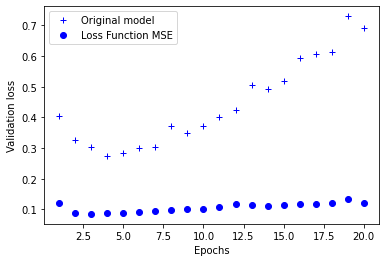

In [ ]:
epochs = range(1, 21)
mse_model_val_loss = mse_model_hist.history['val_loss']


mse_model_val_acc = mse_model_hist.history['val_accuracy']

import matplotlib.pyplot as plt

# b+ is for "blue cross"
plt.plot(epochs, val_loss, 'b+', label='Original model')
# "bo" is for "blue dot"
plt.plot(epochs, mse_model_val_loss, 'bo', label='Loss Function MSE')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()


The model performs pretty good when loss function is mse compared to our original model. We have the highest accuracy at epoch=2.

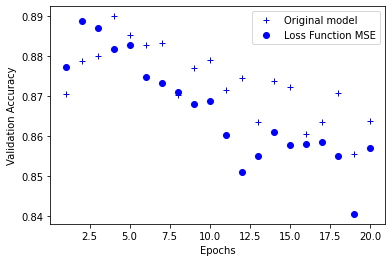

In [ ]:
# b+ is for "blue cross"
plt.plot(epochs, val_acc, 'b+', label='Original model')
# "bo" is for "blue dot"
plt.plot(epochs, mse_model_val_acc, 'bo', label='Loss Function MSE')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()

plt.show()


In [ ]:
mse_model = models.Sequential()
mse_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
mse_model.add(layers.Dense(16, activation='relu'))
mse_model.add(layers.Dense(1, activation='sigmoid'))

mse_model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['accuracy'])

mse_model.fit(x_train, y_train, epochs=2, batch_size=512)
resultsmse = mse_model.evaluate(x_test, y_test)

Epoch 1/2
49/49 [==============================] - 2s 29ms/step - loss: 0.1857 - accuracy: 0.7356
Epoch 2/2
782/782 [==============================] - 2s 2ms/step - loss: 0.0880 - accuracy: 0.8875


Result for the Test Set:

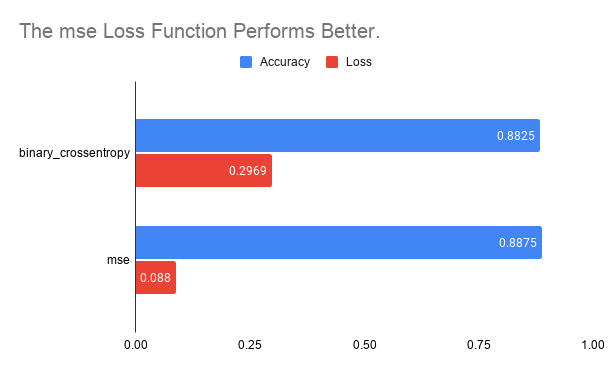

##4. Using the tanh activation function instead of relu

In [ ]:
#Building the model with Activation Function = tanh

from keras import models
from keras import layers

tanh_model = models.Sequential()
tanh_model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
tanh_model.add(layers.Dense(16, activation='tanh'))
tanh_model.add(layers.Dense(1, activation='sigmoid'))


tanh_model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])


tanh_model_hist = tanh_model.fit(x_train, y_train,
                                       epochs=20,
                                       batch_size=512,
                                       validation_data=(x_test, y_test))



Epoch 1/20
49/49 [==============================] - 3s 49ms/step - loss: 0.5230 - accuracy: 0.7529 - val_loss: 0.3401 - val_accuracy: 0.8630
Epoch 2/20
49/49 [==============================] - 2s 38ms/step - loss: 0.2513 - accuracy: 0.9078 - val_loss: 0.3183 - val_accuracy: 0.8680
Epoch 3/20
49/49 [==============================] - 2s 38ms/step - loss: 0.1778 - accuracy: 0.9385 - val_loss: 0.3653 - val_accuracy: 0.8573
Epoch 4/20
49/49 [==============================] - 2s 38ms/step - loss: 0.1457 - accuracy: 0.9497 - val_loss: 0.3205 - val_accuracy: 0.8768
Epoch 5/20
49/49 [==============================] - 2s 38ms/step - loss: 0.1192 - accuracy: 0.9597 - val_loss: 0.3550 - val_accuracy: 0.8711
Epoch 6/20
49/49 [==============================] - 2s 39ms/step - loss: 0.1089 - accuracy: 0.9641 - val_loss: 0.3812 - val_accuracy: 0.8698
Epoch 7/20
49/49 [==============================] - 2s 39ms/step - loss: 0.0890 - accuracy: 0.9707 - val_loss: 0.4105 - val_accuracy: 0.8655
Epoch 8/20
49

We have highest accuracy at epoch=4.

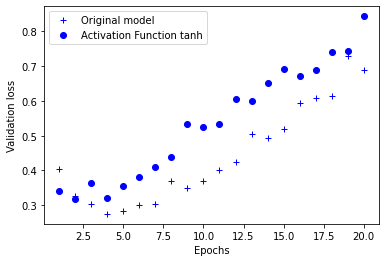

In [ ]:
epochs = range(1, 21)
tanh_model_val_loss = tanh_model_hist.history['val_loss']


tanh_model_val_acc = tanh_model_hist.history['val_accuracy']

import matplotlib.pyplot as plt

# b+ is for "blue cross"
plt.plot(epochs, val_loss, 'b+', label='Original model')
# "bo" is for "blue dot"
plt.plot(epochs, tanh_model_val_loss, 'bo', label='Activation Function tanh')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()


I think our original model was performing better.

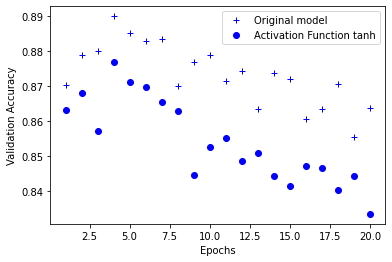

In [ ]:
# b+ is for "blue cross"
plt.plot(epochs, val_acc, 'b+', label='Original model')
# "bo" is for "blue dot"
plt.plot(epochs, tanh_model_val_acc, 'bo', label='Activation Function tanh')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()

plt.show()


Even in terms of validation accuracy, our original model with relu as activation function had better accuracy for the overall model.

In [ ]:
tanh_model = models.Sequential()
tanh_model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
tanh_model.add(layers.Dense(16, activation='tanh'))
tanh_model.add(layers.Dense(1, activation='sigmoid'))

tanh_model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

tanh_model.fit(x_train, y_train, epochs=4, batch_size=512)
resultstanh = tanh_model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 27ms/step - loss: 0.5176 - accuracy: 0.7500
Epoch 2/4
49/49 [==============================] - 1s 27ms/step - loss: 0.2423 - accuracy: 0.9165
Epoch 3/4
49/49 [==============================] - 1s 27ms/step - loss: 0.1731 - accuracy: 0.9393
Epoch 4/4
782/782 [==============================] - 1s 2ms/step - loss: 0.3456 - accuracy: 0.8726


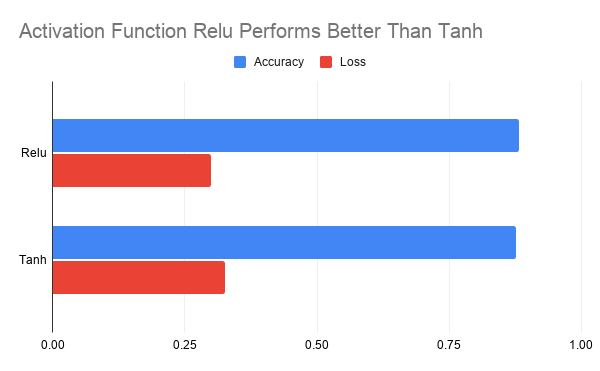

##5.Use any technique including regularization, dropout, etc., to get your model to perform better on validation

We have already increased and decresed the size of our network and come to the conclusion that our 16 Hidden Units network with 2 layers performs better. 

So, Now let's try to use Regularisation


In [ ]:
from keras import regularizers

l2_model = models.Sequential()
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu', input_shape=(10000,)))
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu'))
l2_model.add(layers.Dense(1, activation='sigmoid'))

l2_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

l2_model_hist = l2_model.fit(x_train, y_train,
                             epochs=20,
                             batch_size=512,
                             validation_data=(x_test, y_test))



Epoch 1/20
49/49 [==============================] - 3s 51ms/step - loss: 0.5837 - accuracy: 0.7476 - val_loss: 0.3732 - val_accuracy: 0.8787
Epoch 2/20
49/49 [==============================] - 2s 39ms/step - loss: 0.3198 - accuracy: 0.9051 - val_loss: 0.3481 - val_accuracy: 0.8797
Epoch 3/20
49/49 [==============================] - 2s 39ms/step - loss: 0.2636 - accuracy: 0.9250 - val_loss: 0.3413 - val_accuracy: 0.8838
Epoch 4/20
49/49 [==============================] - 2s 39ms/step - loss: 0.2504 - accuracy: 0.9295 - val_loss: 0.3534 - val_accuracy: 0.8783
Epoch 5/20
49/49 [==============================] - 2s 39ms/step - loss: 0.2339 - accuracy: 0.9341 - val_loss: 0.3446 - val_accuracy: 0.8839
Epoch 6/20
49/49 [==============================] - 2s 39ms/step - loss: 0.2180 - accuracy: 0.9438 - val_loss: 0.3537 - val_accuracy: 0.8805
Epoch 7/20
49/49 [==============================] - 2s 40ms/step - loss: 0.2112 - accuracy: 0.9473 - val_loss: 0.3926 - val_accuracy: 0.8677
Epoch 8/20
49

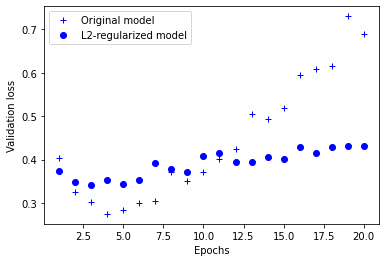

In [ ]:
l2_model_val_loss = l2_model_hist.history['val_loss']

plt.plot(epochs, val_loss, 'b+', label='Original model')
plt.plot(epochs, l2_model_val_loss, 'bo', label='L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

We get best accuracy at epoch 5

In [ ]:
l2_model = models.Sequential()
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu', input_shape=(10000,)))
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu'))
l2_model.add(layers.Dense(1, activation='sigmoid'))

l2_model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

l2_model.fit(x_train, y_train, epochs=5, batch_size=512)
resultsl2 = l2_model.evaluate(x_test, y_test)

Epoch 1/5
49/49 [==============================] - 2s 27ms/step - loss: 0.6127 - accuracy: 0.6923
Epoch 2/5
49/49 [==============================] - 1s 27ms/step - loss: 0.3492 - accuracy: 0.9042
Epoch 3/5
49/49 [==============================] - 1s 27ms/step - loss: 0.2843 - accuracy: 0.9232
Epoch 4/5
49/49 [==============================] - 1s 28ms/step - loss: 0.2544 - accuracy: 0.9321
Epoch 5/5
782/782 [==============================] - 2s 2ms/step - loss: 0.3519 - accuracy: 0.8781


Using Dropout Method

In [ ]:
dpt_model = models.Sequential()
dpt_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(16, activation='relu'))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(1, activation='sigmoid'))

dpt_model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

dpt_model_hist = dpt_model.fit(x_train, y_train,
                               epochs=20,
                               batch_size=512,
                               validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 3s 47ms/step - loss: 0.6402 - accuracy: 0.6174 - val_loss: 0.4390 - val_accuracy: 0.8685
Epoch 2/20
49/49 [==============================] - 2s 39ms/step - loss: 0.4545 - accuracy: 0.8036 - val_loss: 0.3398 - val_accuracy: 0.8837
Epoch 3/20
49/49 [==============================] - 2s 38ms/step - loss: 0.3632 - accuracy: 0.8601 - val_loss: 0.2896 - val_accuracy: 0.8880
Epoch 4/20
49/49 [==============================] - 2s 39ms/step - loss: 0.3068 - accuracy: 0.8874 - val_loss: 0.2792 - val_accuracy: 0.8881
Epoch 5/20
49/49 [==============================] - 2s 38ms/step - loss: 0.2624 - accuracy: 0.9095 - val_loss: 0.2771 - val_accuracy: 0.8897
Epoch 6/20
49/49 [==============================] - 2s 38ms/step - loss: 0.2342 - accuracy: 0.9184 - val_loss: 0.2906 - val_accuracy: 0.8870
Epoch 7/20
49/49 [==============================] - 2s 38ms/step - loss: 0.2127 - accuracy: 0.9249 - val_loss: 0.3182 - val_accuracy: 0.8831
Epoch 8/20
49

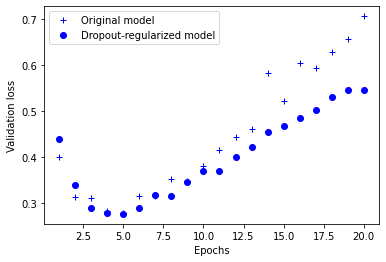

In [ ]:
dpt_model_val_loss = dpt_model_hist.history['val_loss']

plt.plot(epochs, val_loss, 'b+', label='Original model')
plt.plot(epochs, dpt_model_val_loss, 'bo', label='Dropout-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

This is also a good model. Here we have the best accuracy at epoch =5.

In [ ]:
dpt_model = models.Sequential()

dpt_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
dpt_model.add(layers.Dense(16, activation='relu'))
dpt_model.add(layers.Dense(1, activation='sigmoid'))

dpt_model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

dpt_model.fit(x_train, y_train, epochs=5, batch_size=512)
resultsdpt = dpt_model.evaluate(x_test, y_test)

Epoch 1/5
49/49 [==============================] - 2s 26ms/step - loss: 0.5516 - accuracy: 0.7313
Epoch 2/5
49/49 [==============================] - 1s 27ms/step - loss: 0.2656 - accuracy: 0.9102
Epoch 3/5
49/49 [==============================] - 1s 27ms/step - loss: 0.2011 - accuracy: 0.9291
Epoch 4/5
49/49 [==============================] - 1s 27ms/step - loss: 0.1623 - accuracy: 0.9441
Epoch 5/5
782/782 [==============================] - 2s 2ms/step - loss: 0.3534 - accuracy: 0.8670


Result for the Test Data:

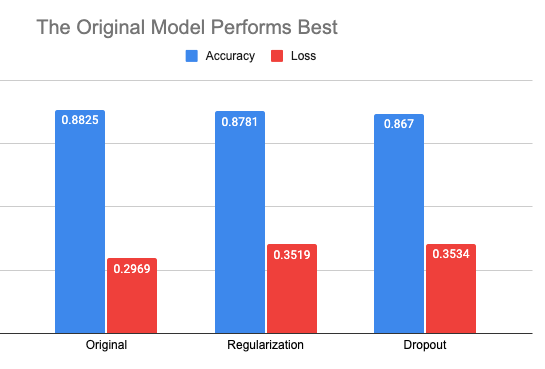

##Summary for the Model

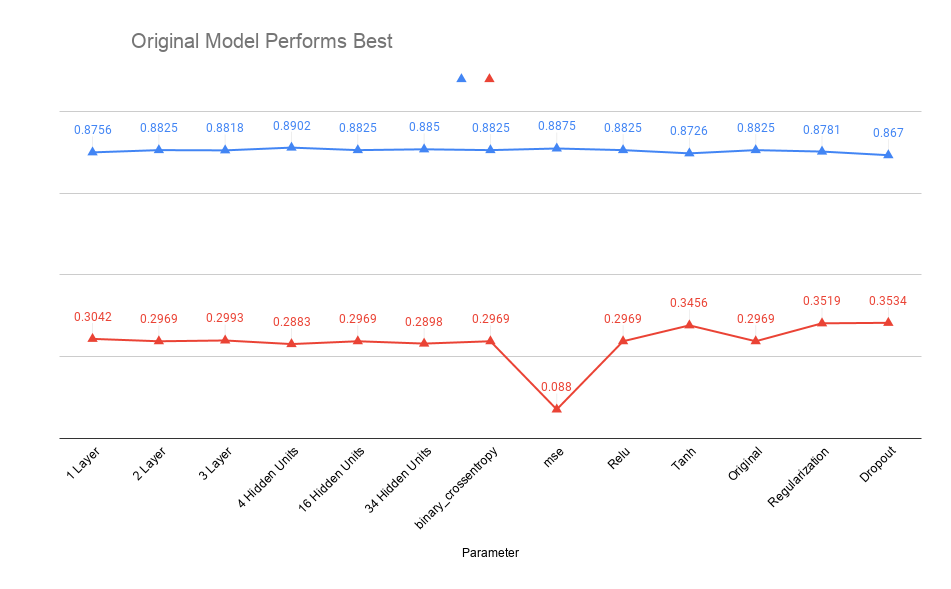

After changing all the parameters, we realize that the model performs best with 2 layers of 16 hidden units with mse as the loss function and relu as the activation function without any regularisation or dropout.